In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
import warnings
warnings.simplefilter('ignore', DeprecationWarning)


# Feature selection

1) For feature selection, XGBoost get_score() function is used to find feature score and visualize the result

Text(0.5,0,'Score')

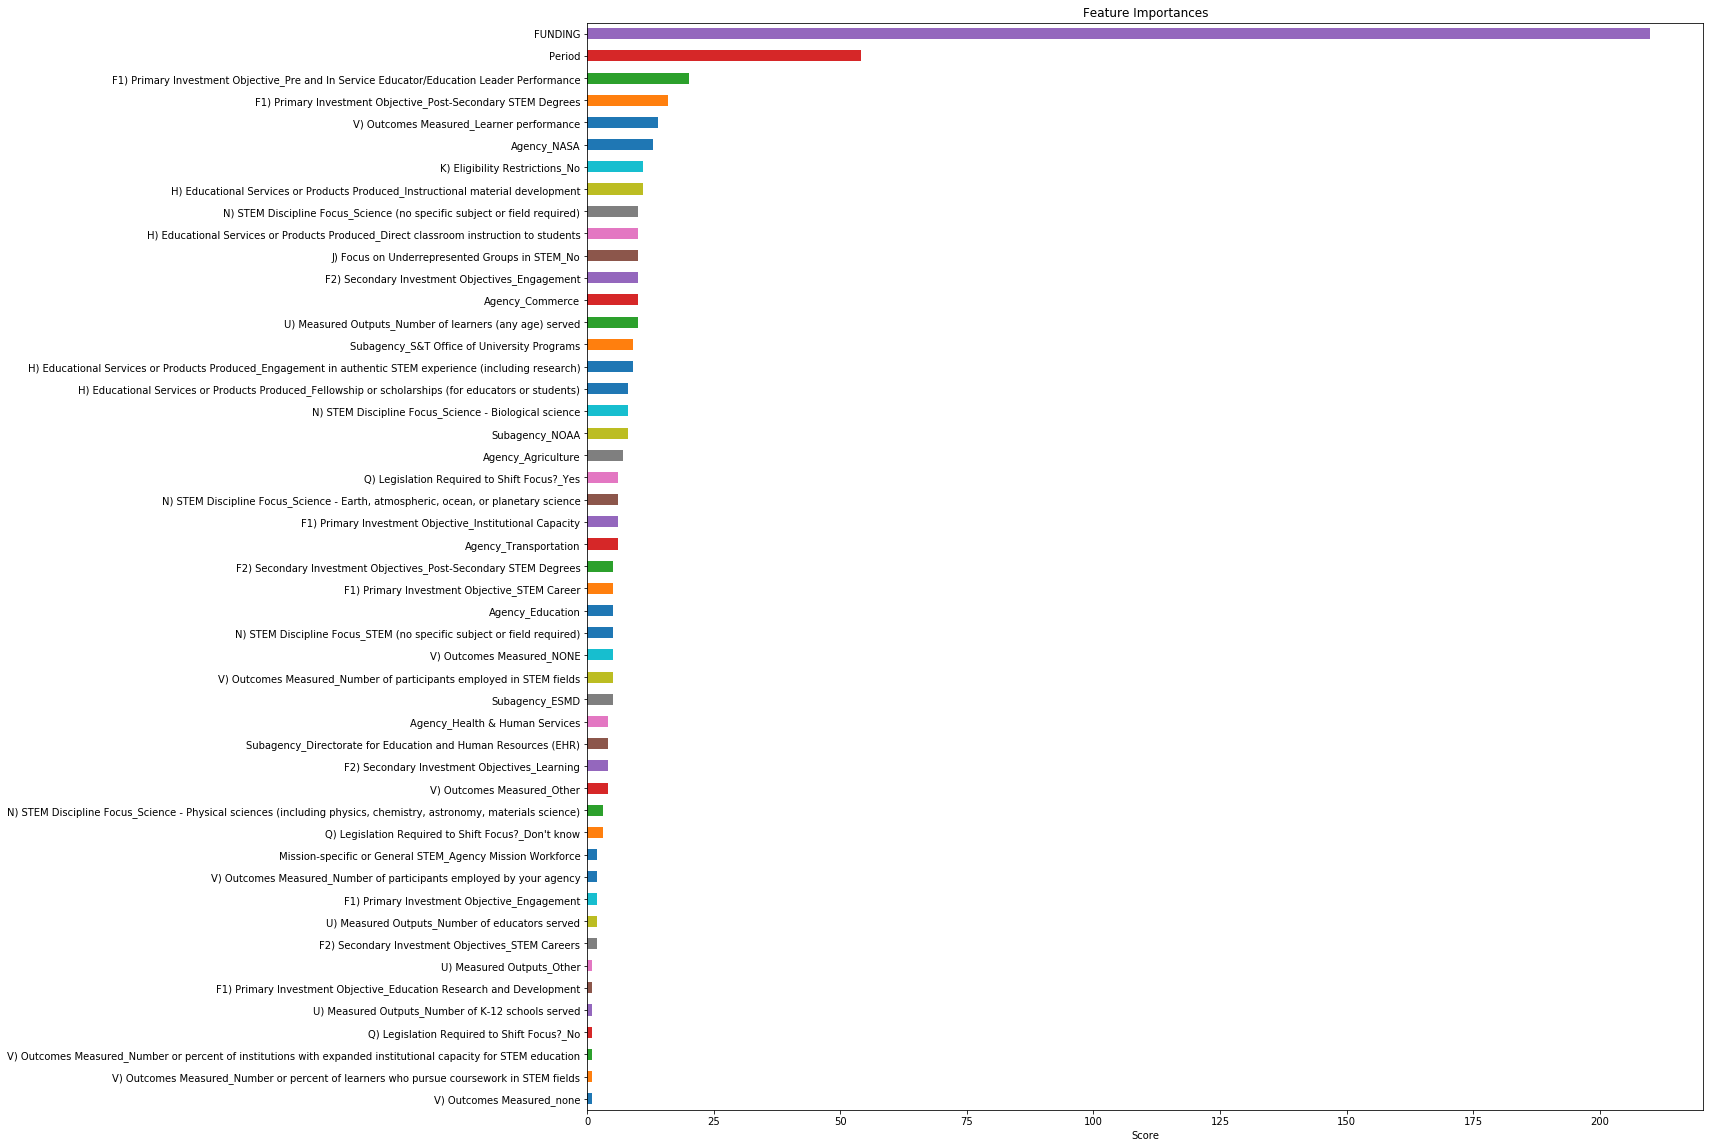

In [2]:
dataframe=pd.read_csv("Dataset.csv")
variable= [x for x in dataframe.columns if x not in ["Target"]]
target="Target"
model=XGBClassifier()
model.fit(dataframe[variable],dataframe[target])
feature = pd.Series(model.get_booster().get_score(importance_type='weight')).sort_values(ascending=True)
rcParams['figure.figsize'] = 20,20
feature.plot(kind='barh', title='Feature Importances')
plt.xlabel('Score')

In [3]:
selected_feature=["FUNDING","Period","F2) Secondary Investment Objectives_Learning","K) Eligibility Restrictions_No","J) Focus on Underrepresented Groups in STEM_No","V) Outcomes Measured_none","F1) Primary Investment Objective_Post-Secondary STEM Degrees","H) Educational Services or Products Produced_Direct classroom instruction to students","F1) Primary Investment Objective_STEM Career","V) Outcomes Measured_Number of participants employed by your agency","Subagency_Education Office","U) Measured Outputs_Number of learners (any age) served","Agency_NASA","Q) Legislation Required to Shift Focus?_Don't know"]                                                                     
#score >= 5 features are selected for modelling

# Train Test Split

In [4]:
variable=dataframe[selected_feature]
target=dataframe[target]
X_train,X_test,y_train,y_test=train_test_split(variable,target,test_size=0.3,random_state=0)

# Parameter Tuning 

1) The parameter of the xgboost algorithm were found using GridSearchCV and set for the model

In [5]:
 model = XGBClassifier(
 learning_rate =0.8,
 n_estimators=19,
 max_depth=2,
 min_child_weight=1,
 gamma=1.8,
 subsample=0.9,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=38)


# Model fitting and ROC AUS Score

In [6]:
model.fit(X_train,y_train,eval_metric='auc')
train=model.predict(X_train)
test=model.predict(X_test)

print "Model Report \n"
print "ROC AUC Score (Train): %f" % metrics.roc_auc_score(y_train,train) + "\n"
print "ROC AUC Score (Test): %f" % metrics.roc_auc_score(y_test,test) + "\n"

print "Accuracy(%) \n"
print "Train:", str(round((metrics.roc_auc_score(y_train,train)*100),2)) + "% \n"
print "Test:", str(round((metrics.roc_auc_score(y_test,test)*100),2)) + "% \n"



Model Report 

ROC AUC Score (Train): 0.776405

ROC AUC Score (Test): 0.660714

Accuracy(%) 

Train: 77.64% 

Test: 66.07% 

